<a href="https://colab.research.google.com/github/friendship-jung/EVPriceEstimator/blob/main/%EC%A0%84%EA%B8%B0%EC%B0%A8_%EA%B0%80%EA%B2%A9_%EC%98%88%EC%B8%A1_%ED%95%B4%EC%BB%A4%ED%86%A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd "/content/drive/MyDrive"

/content/drive/MyDrive


In [ ]:
! git clone https://github.com/friendship-jung/EVPriceEstimator.git

fatal: destination path 'EVPriceEstimator' already exists and is not an empty directory.


In [ ]:
!git add .
!git commit -m "https://github.com/friendship-jung/EVPriceEstimator"
!git push origin main


fatal: not a git repository (or any parent up to mount point /content)
Stopping at filesystem boundary (GIT_DISCOVERY_ACROSS_FILESYSTEM not set).
fatal: not a git repository (or any parent up to mount point /content)
Stopping at filesystem boundary (GIT_DISCOVERY_ACROSS_FILESYSTEM not set).
fatal: not a git repository (or any parent up to mount point /content)
Stopping at filesystem boundary (GIT_DISCOVERY_ACROSS_FILESYSTEM not set).


In [ ]:
# 데이터시각화를 위한 폰트설정
# 필요 라이브러리 불러오기
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

# apt-get : 패키지 설치 명령어
# -qq : 에러외의 메세지 숨기는 옵션키
!apt-get -qq install fonts-nanum


fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                           # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumGothic'}) # 폰트 설정

In [ ]:
!pip install optuna


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.4/383.4 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.5 MB/s eta 0:00:00


In [4]:
pip install lightgbm catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.2 MB/s eta 0:00:00


In [5]:
!pip install catboost

# 데이터 확인

In [ ]:
import pandas as pd
train = pd.read_csv("/content/drive/MyDrive/전기차 가격 예측 해커톤/train.csv")
train

,ID,제조사,모델,차량상태,배터리용량,구동방식,주행거리(km),보증기간(년),사고이력,연식(년),가격(백만원)
0,TRAIN_0000,P사,TayGTS,Nearly New,86.077,AWD,13642,0,No,2,159.66
1,TRAIN_0001,K사,Niro,Nearly New,56.000,FWD,10199,6,No,0,28.01
2,TRAIN_0002,A사,eT,Brand New,91.200,AWD,2361,7,No,0,66.27
3,TRAIN_0003,A사,RSeTGT,Nearly New,NaN,AWD,21683,3,No,0,99.16
4,TRAIN_0004,B사,i5,Pre-Owned,61.018,AWD,178205,1,No,0,62.02
...,...,...,...,...,...,...,...,...,...,...,...
7492,TRAIN_7492,H사,ION5,Brand New,NaN,AWD,3773,10,No,0,35.95
7493,TRAIN_7493,B사,i3,Pre-Owned,46.000,RWD,135411,2,No,0,23.40
7494,TRAIN_7494,P사,TayCT,Brand New,NaN,AWD,1363,2,No,0,120.00
7495,TRAIN_7495,B사,i3,Nearly New,56.000,RWD,39445,6,No,2,24.00


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7497 entries, 0 to 7496
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        7497 non-null   object 
 1   제조사       7497 non-null   object 
 2   모델        7497 non-null   object 
 3   차량상태      7497 non-null   object 
 4   배터리용량     4786 non-null   float64
 5   구동방식      7497 non-null   object 
 6   주행거리(km)  7497 non-null   int64  
 7   보증기간(년)   7497 non-null   int64  
 8   사고이력      7497 non-null   object 
 9   연식(년)     7497 non-null   int64  
 10  가격(백만원)   7497 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 644.4+ KB


In [ ]:
train['차량상태'].value_counts()

,count
차량상태,
Brand New,3380
Nearly New,2059
Pre-Owned,2058


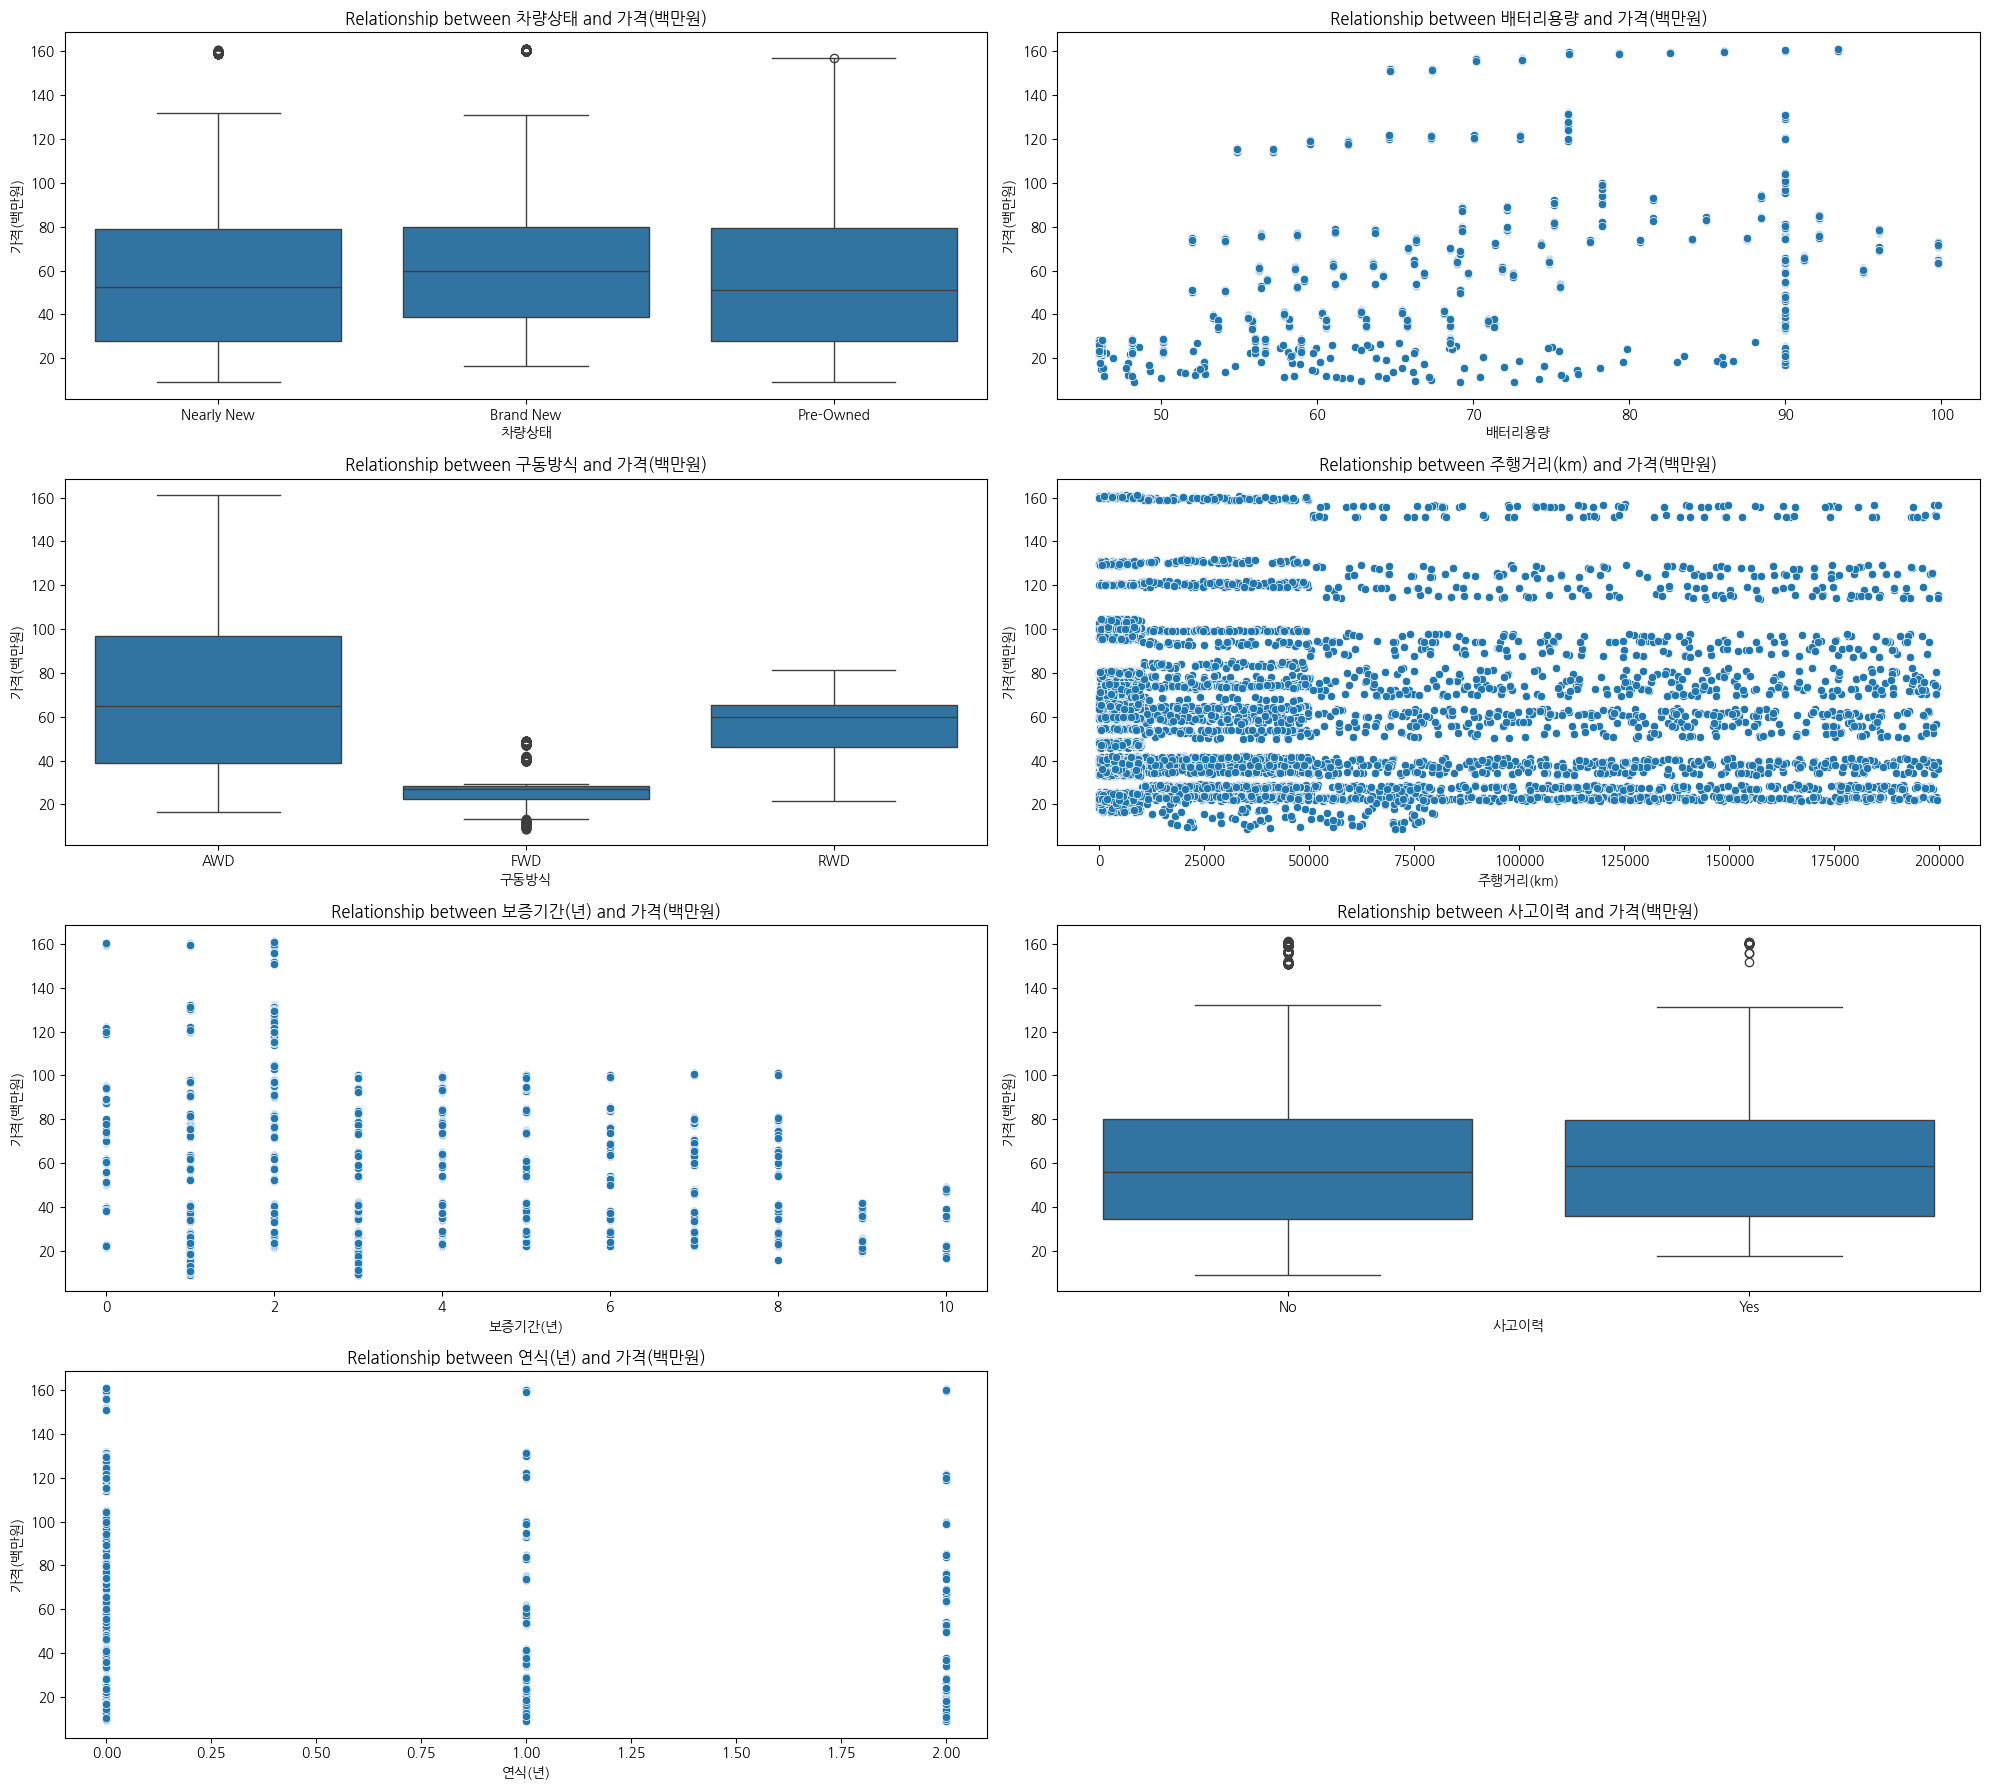

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the figure size and grid for multiple plots
plt.figure(figsize=(20, 18))

# List of columns to plot against price
columns_to_plot = ['차량상태', '배터리용량', '구동방식', '주행거리(km)', '보증기간(년)', '사고이력', '연식(년)']
n = 1  # Starting subplot index

# Loop through each column and create a plot
for column in columns_to_plot:
    plt.subplot(4, 2, n)
    if train[column].dtype == 'object' or column == '차량상태':
        # If categorical, use boxplot
        sns.boxplot(x=column, y='가격(백만원)', data=train)
    else:
        # If numerical, use scatterplot
        sns.scatterplot(x=column, y='가격(백만원)', data=train)

    plt.title(f'Relationship between {column} and 가격(백만원)')
    plt.xlabel(column)
    plt.ylabel('가격(백만원)')
    n += 1

# Adjust layout
plt.tight_layout()
plt.show()


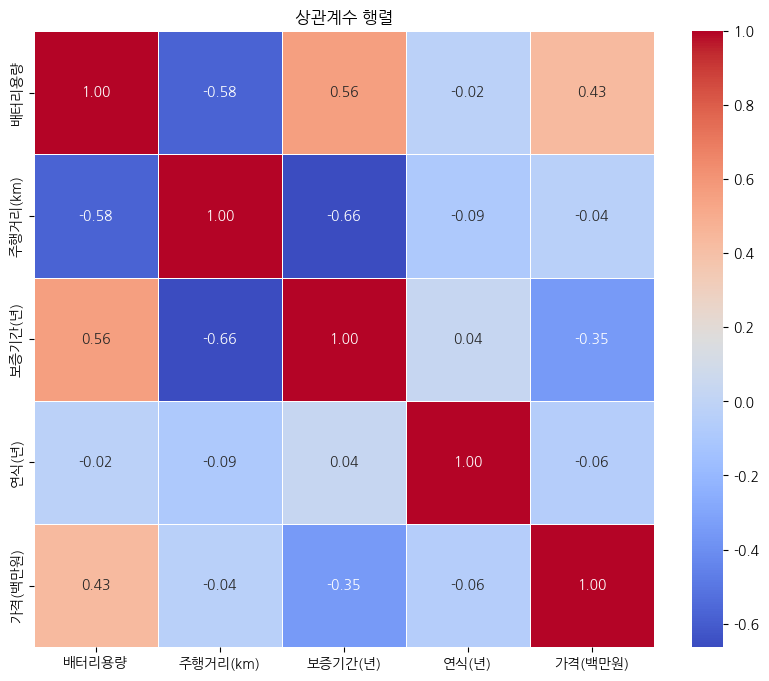

In [ ]:
# 상관계수 행렬 계산
correlation_matrix = train[['배터리용량','주행거리(km)', '보증기간(년)','연식(년)', '가격(백만원)']].corr()

# 상관계수 행렬을 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('상관계수 행렬')
plt.show()


In [ ]:
# 파생변수 생성

# 차량 나이
train['차량나이'] = 2025 - train['연식(년)']

# 주행거리 대비 나이 비율
train['주행거리_대비_나이'] = train['주행거리(km)'] / (train['차량나이'] + 1)  # 나이가 0인 경우를 방지

# 남은 보증기간
train['남은보증기간'] = train['보증기간(년)'] - train['차량나이']

# 배터리 효율
train['배터리효율'] = train['배터리용량'] / (train['주행거리(km)'] + 1)  # 주행거리가 0인 경우 방지

# 구동방식 코드화
train['구동방식코드'] = train['구동방식'].astype('category').cat.codes

# 차량상태와 연식 결합 변수
train['연식_상태'] = train['차량상태'].astype('category').cat.codes * train['연식(년)']

# 결과 확인
train.head()


,ID,제조사,모델,차량상태,배터리용량,구동방식,주행거리(km),보증기간(년),사고이력,연식(년),가격(백만원),차량나이,주행거리_대비_나이,남은보증기간,배터리효율,구동방식코드,연식_상태
0,TRAIN_0000,P사,TayGTS,Nearly New,86.077,AWD,13642,0,No,2,159.66,2023,6.740119,-2023,0.006309,0,2
1,TRAIN_0001,K사,Niro,Nearly New,56.000,FWD,10199,6,No,0,28.01,2025,5.034057,-2019,0.005490,1,0
2,TRAIN_0002,A사,eT,Brand New,91.200,AWD,2361,7,No,0,66.27,2025,1.165350,-2018,0.038611,0,0
3,TRAIN_0003,A사,RSeTGT,Nearly New,NaN,AWD,21683,3,No,0,99.16,2025,10.702369,-2022,NaN,0,0
4,TRAIN_0004,B사,i5,Pre-Owned,61.018,AWD,178205,1,No,0,62.02,2025,87.959033,-2024,0.000342,0,0


/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


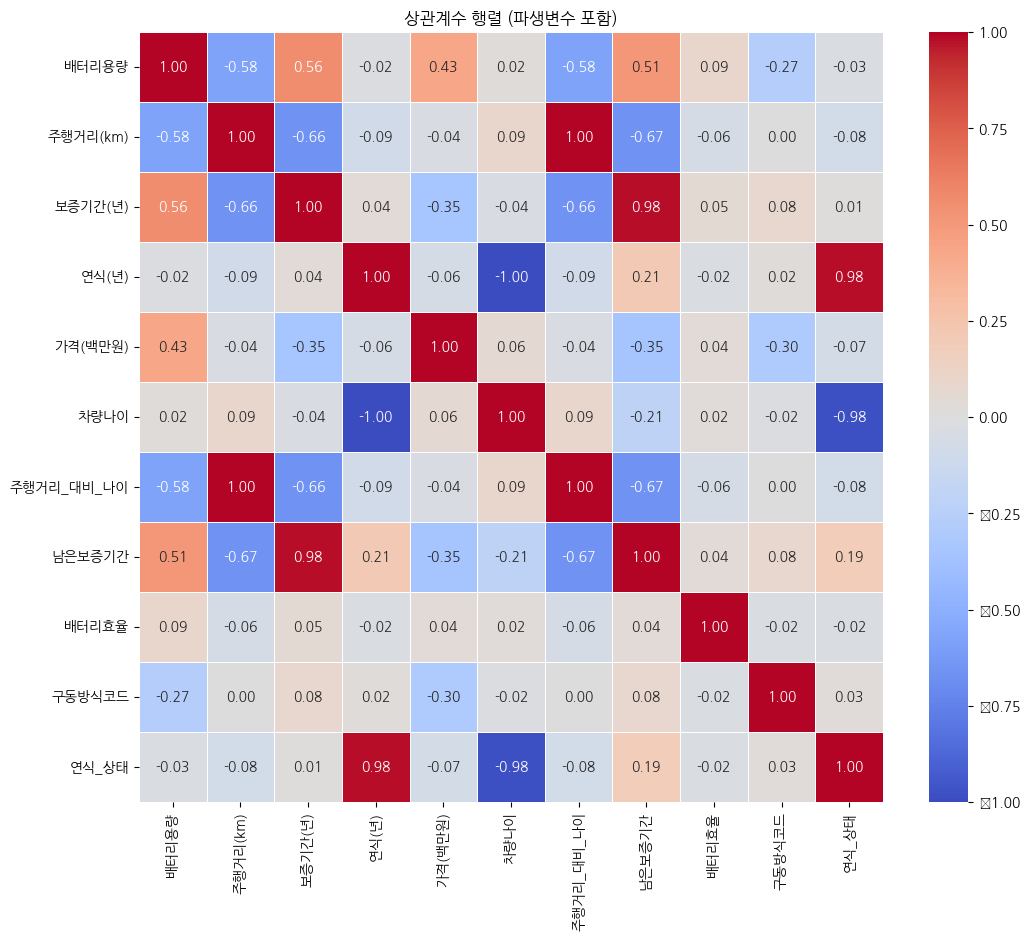

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 파생변수 포함한 상관계수 계산 대상 컬럼
columns_to_analyze = [
    '배터리용량', '주행거리(km)', '보증기간(년)', '연식(년)', '가격(백만원)',
    '차량나이', '주행거리_대비_나이', '남은보증기간', '배터리효율',
    '구동방식코드', '연식_상태'
]

# 상관계수 행렬 계산
correlation_matrix = train[columns_to_analyze].corr()

# 상관계수 행렬을 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('상관계수 행렬 (파생변수 포함)')
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/번기차 가격 예측 해측통/train.csv'

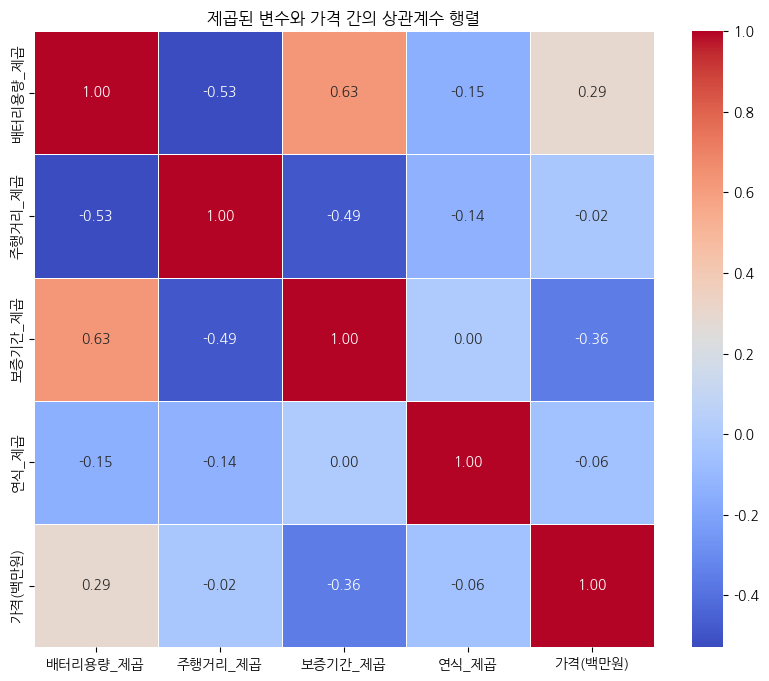

In [ ]:
# 변수들의 제곱값 생성
train['배터리용량_제곱'] = train['배터리용량'] ** 2
train['주행거리_제곱'] = train['주행거리(km)'] ** 2
train['보증기간_제곱'] = train['보증기간(년)'] ** 2
train['연식_제곱'] = train['연식(년)'] ** 2

# 제곱된 변수들과 가격 간의 상관계수 계산
squared_columns = ['배터리용량_제곱', '주행거리_제곱', '보증기간_제곱', '연식_제곱', '가격(백만원)']
squared_correlation_matrix = train[squared_columns].corr()

# 상관계수 행렬 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(squared_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('제곱된 변수와 가격 간의 상관계수 행렬')
plt.show()


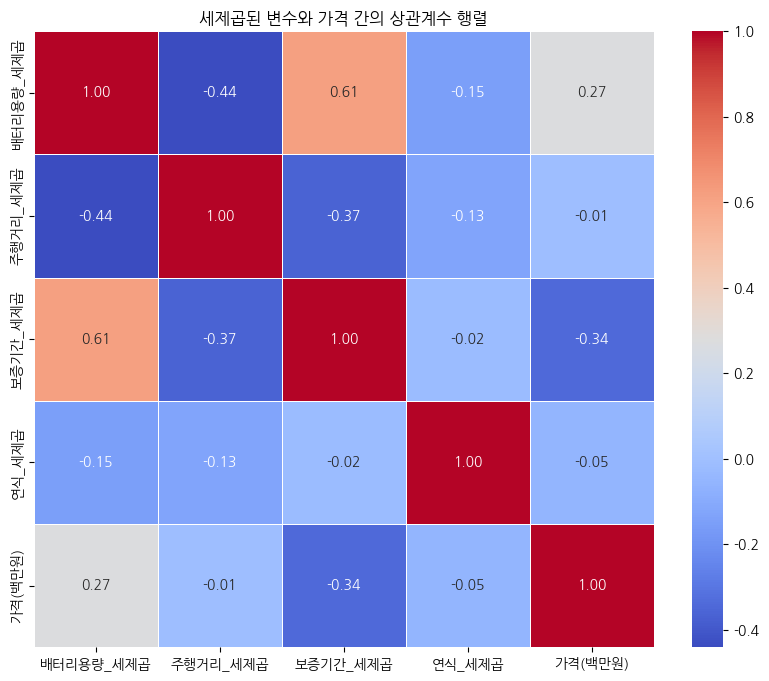

In [ ]:
# 변수들의 제곱값 생성
train['배터리용량_세제곱'] = train['배터리용량'] ** 3
train['주행거리_세제곱'] = train['주행거리(km)'] ** 3
train['보증기간_세제곱'] = train['보증기간(년)'] ** 3
train['연식_세제곱'] = train['연식(년)'] ** 3

# 제곱된 변수들과 가격 간의 상관계수 계산
squared_columns = ['배터리용량_세제곱', '주행거리_세제곱', '보증기간_세제곱', '연식_세제곱', '가격(백만원)']
squared_correlation_matrix = train[squared_columns].corr()

# 상관계수 행렬 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(squared_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('세제곱된 변수와 가격 간의 상관계수 행렬')
plt.show()


In [ ]:
# 범주형 변수와 가격 변수의 상관 관계를 계산하기 위해, 각 범주형 변수를 수치형으로 변환
from scipy.stats import pointbiserialr

# 범주형 변수를 숫자형으로 인코딩
train['차량상태_code'] = train['차량상태'].astype('category').cat.codes
train['구동방식_code'] = train['구동방식'].astype('category').cat.codes
train['사고이력_code'] = train['사고이력'].astype('category').cat.codes

# 각 범주형 변수와 가격(백만원)과의 상관관계 계산
correlation_vehicle_condition = pointbiserialr(train['차량상태_code'], train['가격(백만원)']).correlation
correlation_drive_type = pointbiserialr(train['구동방식_code'], train['가격(백만원)']).correlation
correlation_accident_history = pointbiserialr(train['사고이력_code'], train['가격(백만원)']).correlation

correlation_vehicle_condition, correlation_drive_type, correlation_accident_history


(-0.06501926677125228, -0.29755390476185406, 0.004626857744401438)

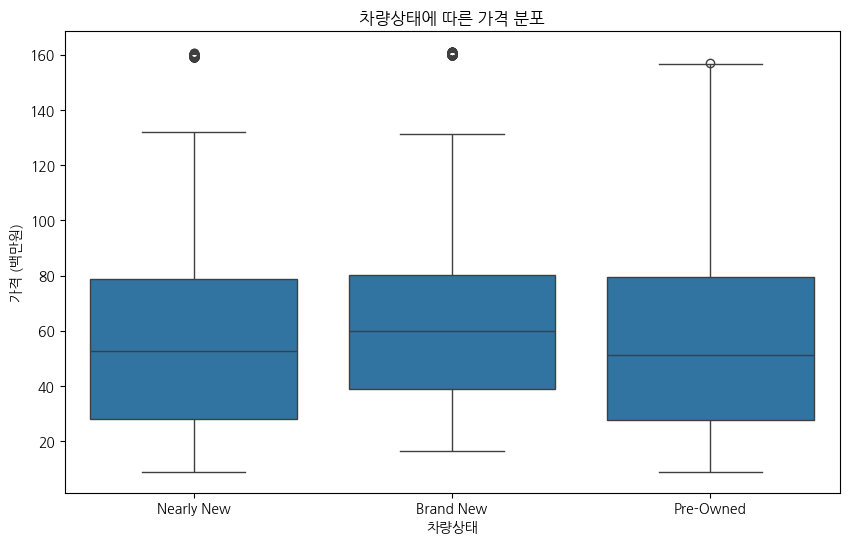

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 차량상태에 따른 가격 분포를 시각화하기 위해 boxplot 사용
plt.figure(figsize=(10, 6))
sns.boxplot(x='차량상태', y='가격(백만원)', data=train)
plt.title('차량상태에 따른 가격 분포')
plt.xlabel('차량상태')
plt.ylabel('가격 (백만원)')
plt.show()


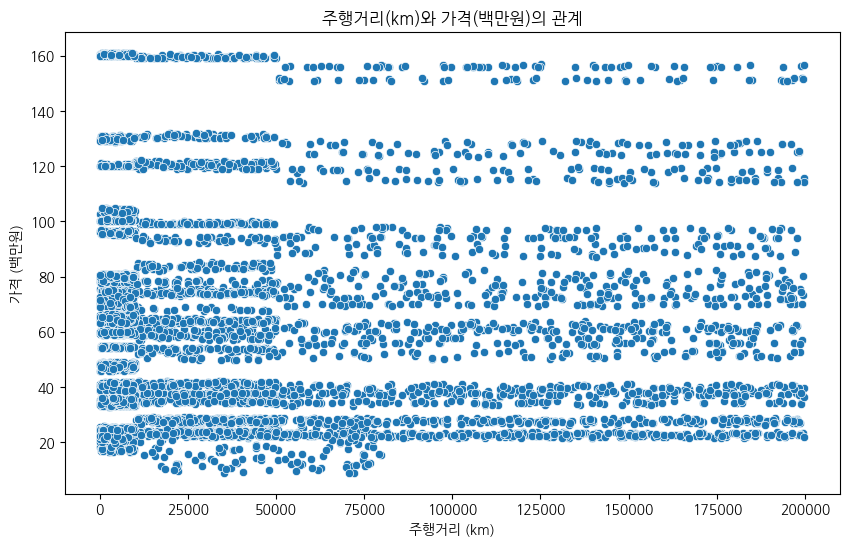

In [ ]:
# 주행거리(km)와 가격(백만원) 간의 관계를 시각화하기 위해 scatter plot 사용
plt.figure(figsize=(10, 6))
sns.scatterplot(x='주행거리(km)', y='가격(백만원)', data=train)
plt.title('주행거리(km)와 가격(백만원)의 관계')
plt.xlabel('주행거리 (km)')
plt.ylabel('가격 (백만원)')
plt.show()


주행거리(km)를 25000단위로 분류하여 가격(백만원)의 관계를 확인

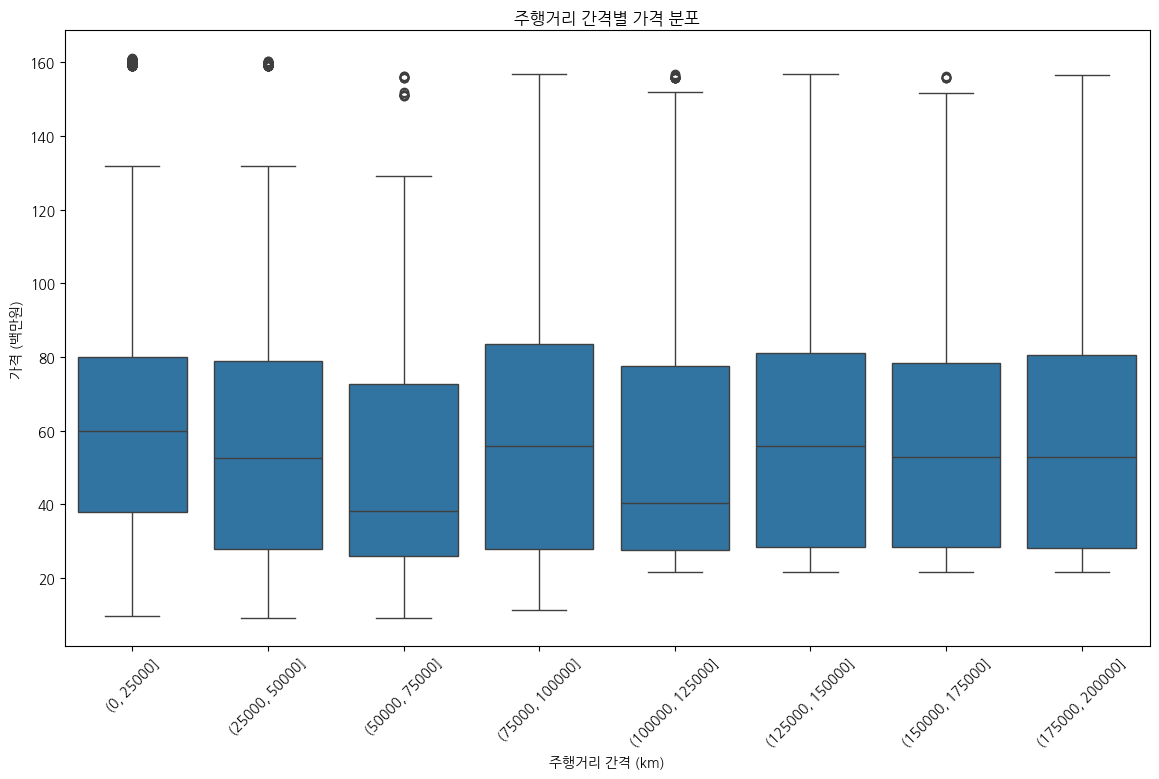

In [ ]:
# 주행거리를 25,000km 간격으로 나누기
train['주행거리_bin'] = pd.cut(train['주행거리(km)'], bins=range(0, int(train['주행거리(km)'].max()) + 25000, 25000))

# 주행거리 간격별 가격 분포를 boxplot으로 시각화
plt.figure(figsize=(14, 8))
sns.boxplot(x='주행거리_bin', y='가격(백만원)', data=train)
plt.title('주행거리 간격별 가격 분포')
plt.xlabel('주행거리 간격 (km)')
plt.ylabel('가격 (백만원)')
plt.xticks(rotation=45)  # x축 라벨 회전
plt.show()


In [ ]:
# 주행거리가 50000에서 75000km 사이인 차량의 차량상태 분포 확인
condition_distribution = train[(train['주행거리(km)'] >= 50000) & (train['주행거리(km)'] < 75000)]['차량상태'].value_counts()

condition_distribution


,count
차량상태,
Pre-Owned,358
Nearly New,26


In [ ]:
# 주행거리가 50000에서 75000km 사이인 차량의 차량상태 분포 확인
condition_distribution = train[(train['주행거리(km)'] >= 75000) & (train['주행거리(km)'] < 100000)]['차량상태'].value_counts()

condition_distribution


,count
차량상태,
Pre-Owned,335
Nearly New,5


그래프 결과 주행거리가 50000~75000 범위의 가격이 낮은 걸로 확인됨.

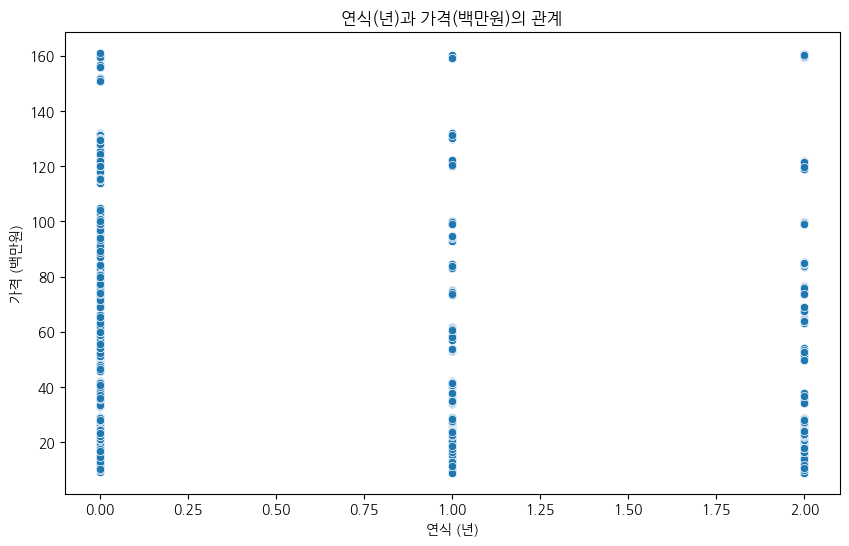

In [ ]:
# 연식(년)과 가격(백만원) 간의 관계를 시각화하기 위해 scatter plot 사용
plt.figure(figsize=(10, 6))
sns.scatterplot(x='연식(년)', y='가격(백만원)', data=train)
plt.title('연식(년)과 가격(백만원)의 관계')
plt.xlabel('연식 (년)')
plt.ylabel('가격 (백만원)')
plt.show()


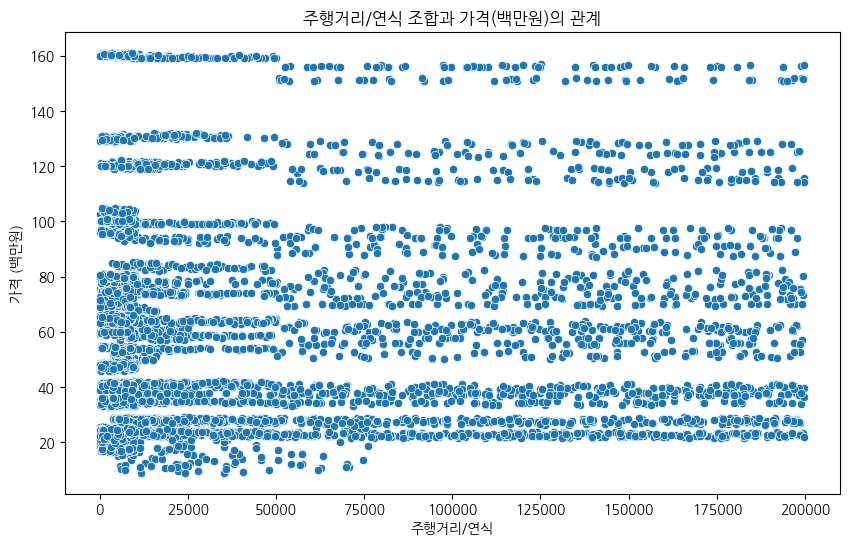

In [ ]:
# 주행거리와 연식의 조합을 새로운 변수로 생성
# 높은 주행거리와 높은 연식의 조합은 일반적으로 차량의 사용 빈도를 나타낼 수 있음
train['주행거리_연식'] = train['주행거리(km)'] / (train['연식(년)'] + 1)  # 연식이 0인 경우를 고려하여 1을 더함

# 새로운 변수 '주행거리_연식'과 가격의 관계를 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(x='주행거리_연식', y='가격(백만원)', data=train)
plt.title('주행거리/연식 조합과 가격(백만원)의 관계')
plt.xlabel('주행거리/연식')
plt.ylabel('가격 (백만원)')
plt.show()


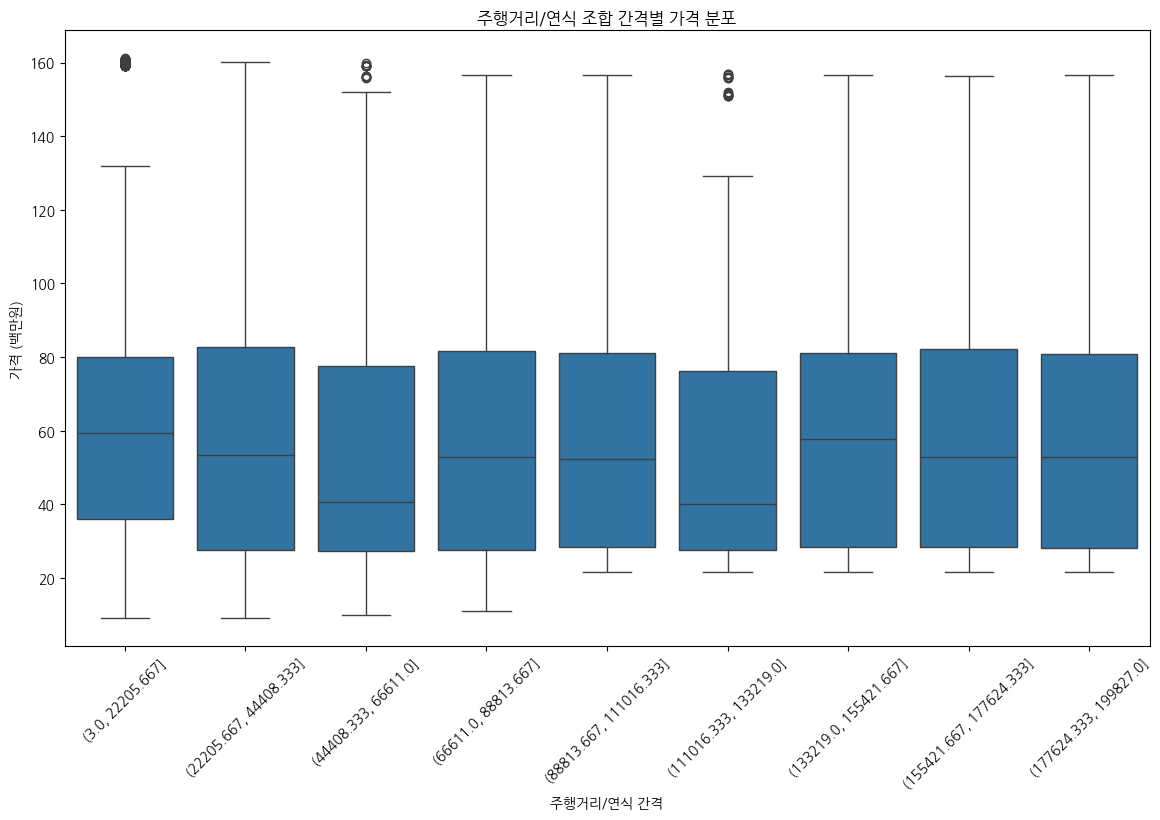

In [ ]:
# 주행거리/연식 조합 변수를 간격으로 나누기
train['주행거리_연식_bin'] = pd.cut(train['주행거리_연식'], bins=np.linspace(train['주행거리_연식'].min(), train['주행거리_연식'].max(), 10))

# 주행거리/연식 간격별 가격 분포를 boxplot으로 시각화
plt.figure(figsize=(14, 8))
sns.boxplot(x='주행거리_연식_bin', y='가격(백만원)', data=train)
plt.title('주행거리/연식 조합 간격별 가격 분포')
plt.xlabel('주행거리/연식 간격')
plt.ylabel('가격 (백만원)')
plt.xticks(rotation=45)  # x축 라벨 회전
plt.show()


<ipython-input-43-09b66803e73f>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_condition_distribution = train.groupby('가격대')['차량상태'].value_counts(normalize=True).unstack()
<ipython-input-43-09b66803e73f>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_drive_distribution = train.groupby('가격대')['구동방식'].value_counts(normalize=True).unstack()


<Figure size 1400x600 with 0 Axes>

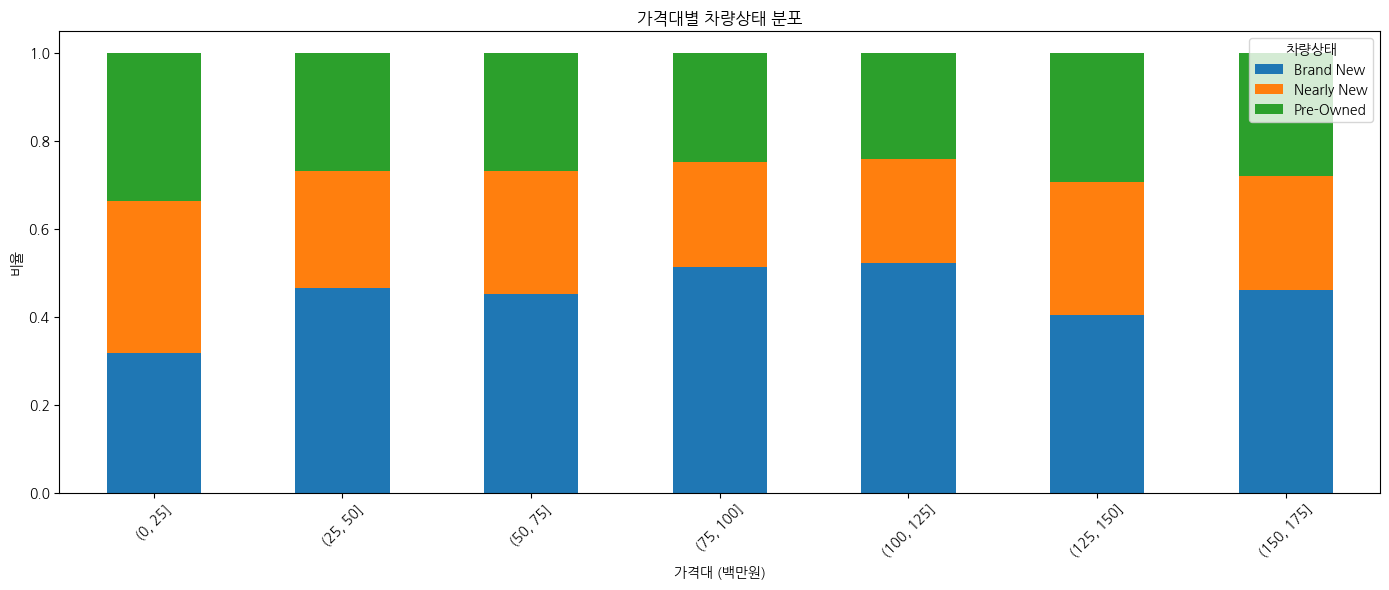

<Figure size 1400x600 with 0 Axes>

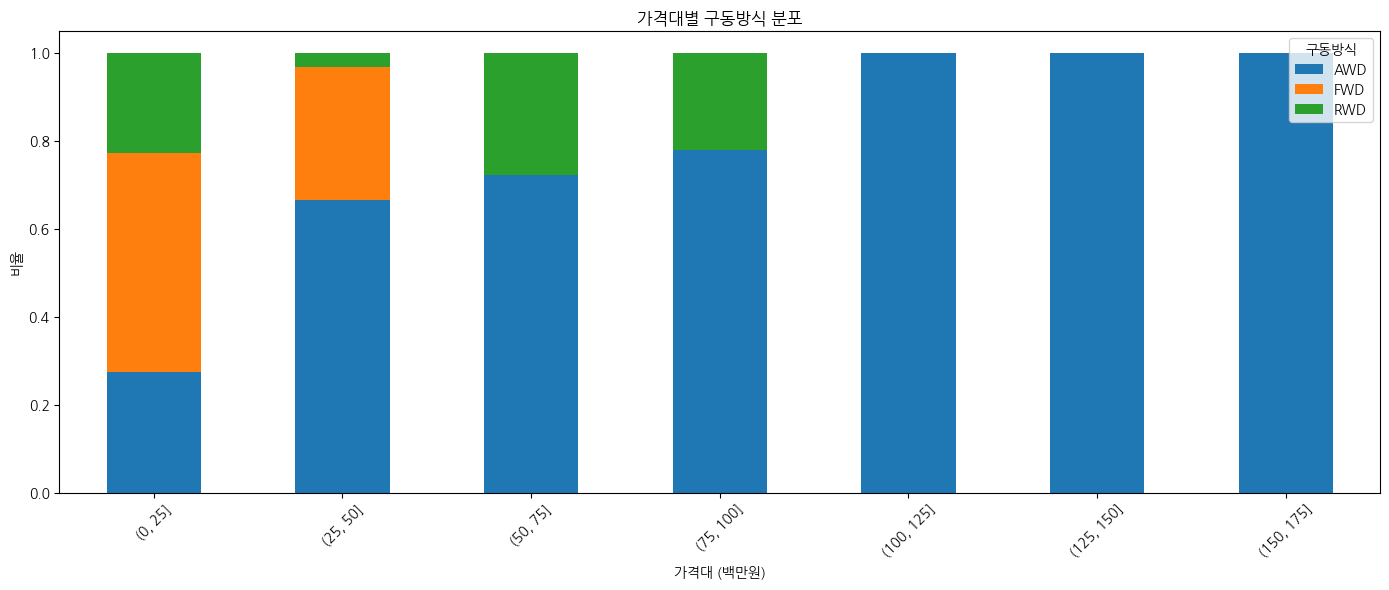

In [ ]:
# 가격대를 구간으로 나누기 (예: 25 백만원 간격)
train['가격대'] = pd.cut(train['가격(백만원)'], bins=range(0, int(train['가격(백만원)'].max()) + 25, 25))

# 가격대별 차량상태 분포
price_condition_distribution = train.groupby('가격대')['차량상태'].value_counts(normalize=True).unstack()

# 가격대별 구동방식 분포
price_drive_distribution = train.groupby('가격대')['구동방식'].value_counts(normalize=True).unstack()

# 가격대별 분포 시각화
plt.figure(figsize=(14, 6))
price_condition_distribution.plot(kind='bar', stacked=True, figsize=(14, 6), title='가격대별 차량상태 분포')
plt.ylabel('비율')
plt.xlabel('가격대 (백만원)')
plt.legend(title='차량상태')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 6))
price_drive_distribution.plot(kind='bar', stacked=True, figsize=(14, 6), title='가격대별 구동방식 분포')
plt.ylabel('비율')
plt.xlabel('가격대 (백만원)')
plt.legend(title='구동방식')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# 제조사별 가격 분포를 다시 확인하고 시각화
if '제조사' in train.columns and '가격(백만원)' in train.columns:
    plt.figure(figsize=(14, 8))
    sns.boxplot(x='제조사', y='가격(백만원)', data=train)
    plt.title('제조사별 가격 분포', fontsize=16)
    plt.xlabel('제조사', fontsize=12)
    plt.ylabel('가격 (백만원)', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("데이터프레임에 '제조사' 또는 '가격(백만원)' 열이 없습니다. 데이터 구성을 확인해주세요.")


NameError: name 'train' is not defined

In [ ]:
test = pd.read_csv("/content/drive/MyDrive/전기차 가격 예측 해커톤/test.csv")
test

,ID,제조사,모델,차량상태,배터리용량,구동방식,주행거리(km),보증기간(년),사고이력,연식(년)
0,TEST_000,P사,TayCT,Nearly New,76.093,AWD,14057,2,No,0
1,TEST_001,B사,iX,Brand New,90.000,AWD,7547,8,No,0
2,TEST_002,B사,i5,Brand New,NaN,RWD,7197,7,Yes,0
3,TEST_003,H사,ION5,Nearly New,68.479,AWD,10357,7,No,1
4,TEST_004,K사,EV6,Brand New,NaN,FWD,7597,10,No,0
...,...,...,...,...,...,...,...,...,...,...
841,TEST_841,P사,TayGTS,Pre-Owned,64.683,AWD,117298,2,No,0
842,TEST_842,V사,ID4,Pre-Owned,55.547,AWD,72308,0,No,0
843,TEST_843,V사,ID4,Pre-Owned,55.547,AWD,124537,0,No,0
844,TEST_844,A사,Q4eT,Nearly New,69.646,AWD,15629,4,No,0


# 데이터 전처리

# 모델 학습 코드

Fitting 5 folds for each of 50 candidates, totalling 250 fits


<ipython-input-15-ae0146c72d9d>:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['배터리용량'].fillna(battery_median, inplace=True)
<ipython-input-15-ae0146c72d9d>:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000582 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 438
[LightGBM] [Info] Number of data points in the train set: 7497, number of used features: 12
[LightGBM] [Info] Start training from score 62.331949
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Best Parameters: {'subsample': 0.8, 'num_leaves': 31, 'n_estimators': 300, 'min_child_samples': 30, 'max_depth': 15, 'learning_rate': 0.05, 'colsample_bytree': 1.0}
Mean Cross-Validation RMSE: 3.13
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000572 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 438
[LightGBM] [Info] Number of data points in the train set: 7497,

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54665 (\N{HANGUL SYLLABLE HAENG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44144 (\N{HANGUL SYLLABLE GEO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47784 (\N{HANGUL SYLLABLE MO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/l

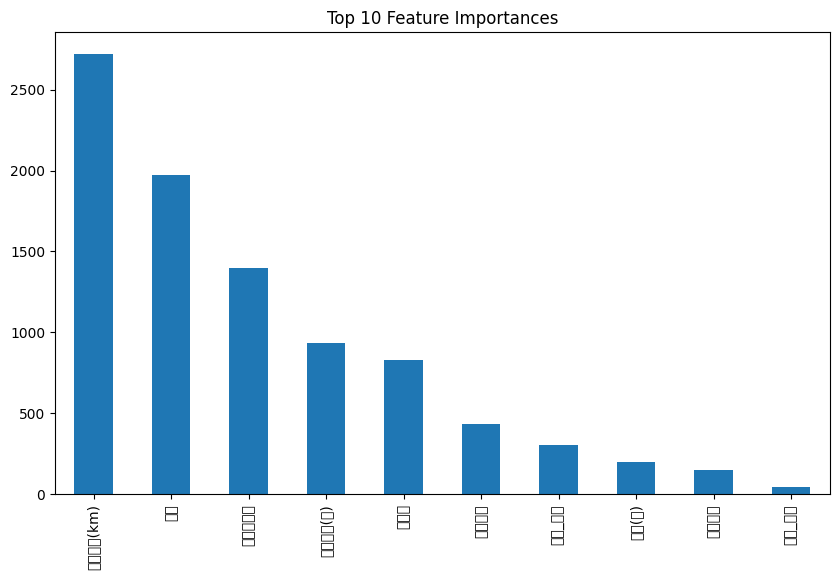

테스트 결과가 'test_predictions.csv'로 저장되었습니다.


In [15]:
# 필요한 라이브러리 임포트
import pandas as pd
import numpy as np
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 데이터 로드
train = pd.read_csv('/content/drive/MyDrive/전기차 가격 예측 해커톤/train.csv')
test = pd.read_csv('/content/drive/MyDrive/전기차 가격 예측 해커톤/test.csv')

# 범주형 변수 변환: ID 제외하고 모든 범주형 변수 처리
for col in train.columns:
    if train[col].dtype == 'object' and col != 'ID':
        train[col] = train[col].astype('category').cat.codes
for col in test.columns:
    if test[col].dtype == 'object' and col != 'ID':
        test[col] = test[col].astype('category').cat.codes

# 결측치 처리: 배터리용량 결측치는 중앙값으로 채움
battery_median = train['배터리용량'].median()
train['배터리용량'].fillna(battery_median, inplace=True)
test['배터리용량'].fillna(battery_median, inplace=True)

# 새로운 변수 생성
train['연식_상태'] = train['연식(년)'] * train['차량상태']
test['연식_상태'] = test['연식(년)'] * test['차량상태']
train['생산_년도'] = 2025 - train['연식(년)']
test['생산_년도'] = 2025 - test['연식(년)']
train['보증_년도'] = train['생산_년도'] + train['보증기간(년)']
test['보증_년도'] = test['생산_년도'] + test['보증기간(년)']

# 특성과 타겟 변수 분리
X = train.drop(columns=['가격(백만원)', 'ID'])
y = train['가격(백만원)']
X_test = test.drop(columns=['ID'])

# 데이터 스케일링
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# 교차 검증(K-Fold) 및 모델 학습
kf = KFold(n_splits=5, shuffle=True, random_state=42)
model = LGBMRegressor(random_state=42)

# 하이퍼파라미터 탐색 공간 축소 및 RandomizedSearchCV
param_grid = {
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [10, 15, 20],
    'num_leaves': [31, 50, 70],
    'min_child_samples': [10, 20, 30],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=50,  # 탐색 횟수
    cv=kf,
    scoring='neg_root_mean_squared_error',
    verbose=1,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X, y)

# 최적의 하이퍼파라미터 출력
best_params = random_search.best_params_
print("Best Parameters:", best_params)

# 최적 모델로 학습
best_model = random_search.best_estimator_

# 교차 검증 평균 RMSE 출력
cv_results = -random_search.cv_results_['mean_test_score']
print(f"Mean Cross-Validation RMSE: {cv_results.mean():.2f}")

# 전체 데이터로 모델 학습
best_model.fit(X, y)

# 검증 데이터 RMSE 계산
y_pred_val = best_model.predict(X)
rmse_val = np.sqrt(mean_squared_error(y, y_pred_val))
print(f"Validation RMSE on Full Training Data: {rmse_val:.2f}")

# 중요 변수 확인 및 시각화
feature_importances = pd.Series(best_model.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
feature_importances.head(10).plot(kind='bar', title='Top 10 Feature Importances')
plt.show()

# 테스트 데이터 예측 및 결과 저장
test['가격(백만원)'] = best_model.predict(X_test)
submission_file = "test_predictions.csv"
test[['ID', '가격(백만원)']].to_csv(submission_file, index=False)
print(f"테스트 결과가 '{submission_file}'로 저장되었습니다.")


# GPU를 사용한 코드

In [3]:
!pip uninstall -y lightgbm
!pip install lightgbm --install-option=--gpu


Found existing installation: lightgbm 4.5.0
Uninstalling lightgbm-4.5.0:
  Successfully uninstalled lightgbm-4.5.0

Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: --install-option


In [5]:
!pip uninstall -y lightgbm
!pip install lightgbm --install-option=--gpu



Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: --install-option


In [5]:
!pip install lightgbm --extra-index-url https://download.pytorch.org/whl/cu116


Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu116
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 30.0 MB/s eta 0:00:00


In [7]:
# 필요한 라이브러리 임포트
import pandas as pd
import numpy as np
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

# 데이터 로드
train = pd.read_csv('/content/drive/MyDrive/전기차 가격 예측 해커톤/train.csv')
test = pd.read_csv('/content/drive/MyDrive/전기차 가격 예측 해커톤/test.csv')

# 범주형 변수 변환: ID 제외하고 모든 범주형 변수 처리
for col in train.columns:
    if train[col].dtype == 'object' and col != 'ID':
        train[col] = train[col].astype('category').cat.codes
for col in test.columns:
    if test[col].dtype == 'object' and col != 'ID':
        test[col] = test[col].astype('category').cat.codes

# 결측치 처리: 배터리용량 결측치는 중앙값으로 채움
battery_median = train['배터리용량'].median()
train['배터리용량'].fillna(battery_median, inplace=True)
test['배터리용량'].fillna(battery_median, inplace=True)

# 새로운 변수 생성
train['연식_상태'] = train['연식(년)'] * train['차량상태']
test['연식_상태'] = test['연식(년)'] * test['차량상태']

train['생산_년도'] = 2025 - train['연식(년)']
test['생산_년도'] = 2025 - test['연식(년)']

train['보증_년도'] = train['생산_년도'] + train['보증기간(년)']
test['보증_년도'] = test['생산_년도'] + test['보증기간(년)']

# 특성과 타겟 변수 분리
X = train.drop(columns=['가격(백만원)', 'ID'])
y = train['가격(백만원)']
X_test = test.drop(columns=['ID'])

# 훈련 및 검증 데이터 분리
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 하이퍼파라미터 탐색 범위 확장
lgbm_params = {
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [-1, 10, 20],
    'num_leaves': [31, 40, 60],
    'min_child_samples': [10, 20, 30],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gpu_use_dp': [True],  # CUDA를 활용한 더블 프리시전 사용
    'tree_method': ['gpu_hist']  # GPU 히스토그램 트리 방식 사용
}

# LightGBM 모델 생성 (GPU 활성화)
lgbm = LGBMRegressor(random_state=42, device='gpu', gpu_platform_id=0, gpu_device_id=0)

# GridSearchCV를 통한 하이퍼파라미터 튜닝
grid_search = GridSearchCV(
    estimator=lgbm,
    param_grid=lgbm_params,
    cv=3,
    scoring='neg_root_mean_squared_error',  # RMSE 기반 평가
    verbose=1,
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# 최적의 모델로 학습
best_lgbm = grid_search.best_estimator_

# 모델 평가
best_lgbm.fit(X_train, y_train)
y_pred = best_lgbm.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f"LightGBM Model RMSE: {rmse:.2f}")

# 테스트 데이터 예측 및 결과 저장
test['가격(백만원)'] = best_lgbm.predict(X_test)
submission_file = "test_predictions.csv"
test[['ID', '가격(백만원)']].to_csv(submission_file, index=False)
print(f"테스트 결과가 '{submission_file}'로 저장되었습니다.")


Fitting 3 folds for each of 2187 candidates, totalling 6561 fits


<ipython-input-7-e2a2bdfea4b4>:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['배터리용량'].fillna(battery_median, inplace=True)
<ipython-input-7-e2a2bdfea4b4>:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

ValueError: 
All the 6561 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6561 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/lightgbm/sklearn.py", line 1189, in fit
    super().fit(
  File "/usr/local/lib/python3.11/dist-packages/lightgbm/sklearn.py", line 955, in fit
    self._Booster = train(
                    ^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/lightgbm/engine.py", line 282, in train
    booster = Booster(params=params, train_set=train_set)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/lightgbm/basic.py", line 3641, in __init__
    _safe_call(
  File "/usr/local/lib/python3.11/dist-packages/lightgbm/basic.py", line 296, in _safe_call
    raise LightGBMError(_LIB.LGBM_GetLastError().decode("utf-8"))
lightgbm.basic.LightGBMError: No OpenCL device found
